In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Đọc dữ liệu chứng khoán từ file csv

In [61]:
file_dulieu = r'C:\Users\DELL\Desktop\vn30_2024.csv'

In [63]:
# Đọc tệp CSV vào DataFrame với đa chỉ mục cột (MultiIndex)
chungkhoan = pd.read_csv(file_dulieu, header = [0,1], index_col = [0], parse_dates = [0])
# - `header=[0,1]`: Dùng hai hàng đầu tiên làm tiêu đề cột  
# - `index_col=[0]`: Dùng cột đầu tiên làm chỉ mục (index)  
# - `parse_dates=[0]`: Chuyển cột đầu tiên thành kiểu datetime nếu chứa dữ liệu thời gian  

In [65]:
chungkhoan.head()

TradingDate    Close                                                        \
                 ACB      BCM      BID      BVH      CTG      FPT      GAS   
2024-01-02   20538.0  60972.0  35535.0  38693.0  27200.0  82248.0  68796.0   
2024-01-03   21000.0  60578.0  36196.0  38889.0  27600.0  82591.0  69160.0   
2024-01-04   21252.0  59888.0  36072.0  39182.0  28600.0  83363.0  69797.0   
2024-01-05   21378.0  59593.0  36775.0  39084.0  29000.0  83534.0  70252.0   
2024-01-08   21294.0  59396.0  38345.0  39084.0  29550.0  83448.0  69888.0   

TradingDate                             ...      Volume              \
                 GVR      HDB      HPG  ...         SSI         STB   
2024-01-02   20757.0  15928.0  24955.0  ...  18052300.0  14813300.0   
2024-01-03   21401.0  16008.0  25273.0  ...  11408700.0  19990700.0   
2024-01-04   21203.0  16328.0  25228.0  ...  58713300.0  31414000.0   
2024-01-05   21599.0  16408.0  25273.0  ...  25137200.0  31291500.0   
2024-01-08   21302.0  16448.0  25318.0  ...  20729000.0  15853600.0   

TradingDate                                                            \
                    TCB         TPB        VCB        VHM         VIB   
2024-01-02    3710100.0   6970700.0  1785800.0  7588500.0   4383500.0   
2024-01-03    5610600.0   7154500.0  1373000.0  6112600.0   4469800.0   
2024-01-04   10073900.0  30598000.0  2657900.0  8778000.0  10162800.0   
2024-01-05    3569900.0  11024500.0  1180300.0  4508700.0   4437400.0   
2024-01-08    6323800.0  10132200.0  1607800.0  6213900.0   6160100.0   

TradingDate                                  
                   VIC       VJC        VNM  
2024-01-02   2281300.0  929800.0  2142800.0  
2024-01-03   2275100.0  882300.0  1889800.0  
2024-01-04   2337800.0  667500.0  3401500.0  
2024-01-05   1481600.0  633100.0  1475700.0  
2024-01-08   2534400.0  626300.0  2396400.0  

[5 rows x 180 columns]

In [67]:
# Tạo df giadongcua được tạo bằng cách sao chép dữ liệu giá đóng cửa từ cột Close của DataFrame chungkhoan để lưu trữ và xử lý độc lập.
giadongcua = chungkhoan.Close.copy()

# Đặt tên cho Index của là "Ngày giao dịch"
giadongcua.index.name = "Ngày giao dịch"

In [71]:
# Hiển thị 7 hàng đầu tiên của dữ liệu trong giadongcua
giadongcua.tail(7)

,ACB,BCM,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,SSI,STB,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM
Ngày giao dịch,,,,,,,,,,,,,,,,,,,,,
2024-12-23,24900.0,67900.0,38600.0,53100.0,36250.0,149800.0,68500.0,30850.0,23400.0,27000.0,...,25850.0,34500.0,23900.0,16050.0,92400.0,40600.0,18950.0,40600.0,100600.0,63898.0
2024-12-24,25000.0,67900.0,38100.0,52800.0,36200.0,150400.0,68200.0,30700.0,23400.0,26700.0,...,25950.0,34700.0,24000.0,16050.0,92100.0,40350.0,19050.0,40600.0,101000.0,63798.0
2024-12-25,25450.0,69300.0,38650.0,53600.0,38200.0,150800.0,68400.0,31100.0,23900.0,27150.0,...,26550.0,36250.0,24450.0,16400.0,92400.0,40600.0,19200.0,40650.0,102000.0,63898.0
2024-12-26,25550.0,69700.0,39000.0,52600.0,38200.0,149800.0,68500.0,30900.0,24150.0,27000.0,...,26350.0,37100.0,24350.0,16550.0,92100.0,40650.0,19750.0,40650.0,101500.0,63800.0
2024-12-27,25550.0,69800.0,39150.0,52300.0,38800.0,149600.0,68500.0,30700.0,24950.0,26850.0,...,26600.0,37400.0,24600.0,16750.0,92200.0,40350.0,20050.0,40550.0,101200.0,63800.0
2024-12-30,25400.0,69800.0,38250.0,52000.0,38900.0,150500.0,68200.0,30550.0,26650.0,26750.0,...,26450.0,37850.0,24400.0,16650.0,92000.0,40300.0,19750.0,40550.0,100100.0,63300.0
2024-12-31,25800.0,70900.0,37550.0,50700.0,37800.0,152500.0,68100.0,30350.0,25500.0,26650.0,...,26050.0,36900.0,24650.0,16650.0,91200.0,40000.0,19700.0,40550.0,100000.0,63400.0


## Phân tích sơ bộ

In [73]:
# Lấy cột 'FPT' từ DataFrame 'giadongcua' và gán vào biến FPT
fpt= giadongcua['FPT'].to_frame()

In [75]:
fpt.columns = ["Giá đóng cửa"]

In [77]:
fpt.tail()

,Giá đóng cửa
Ngày giao dịch,
2024-12-25,150800.0
2024-12-26,149800.0
2024-12-27,149600.0
2024-12-30,150500.0
2024-12-31,152500.0


## Vẽ biểu đồ

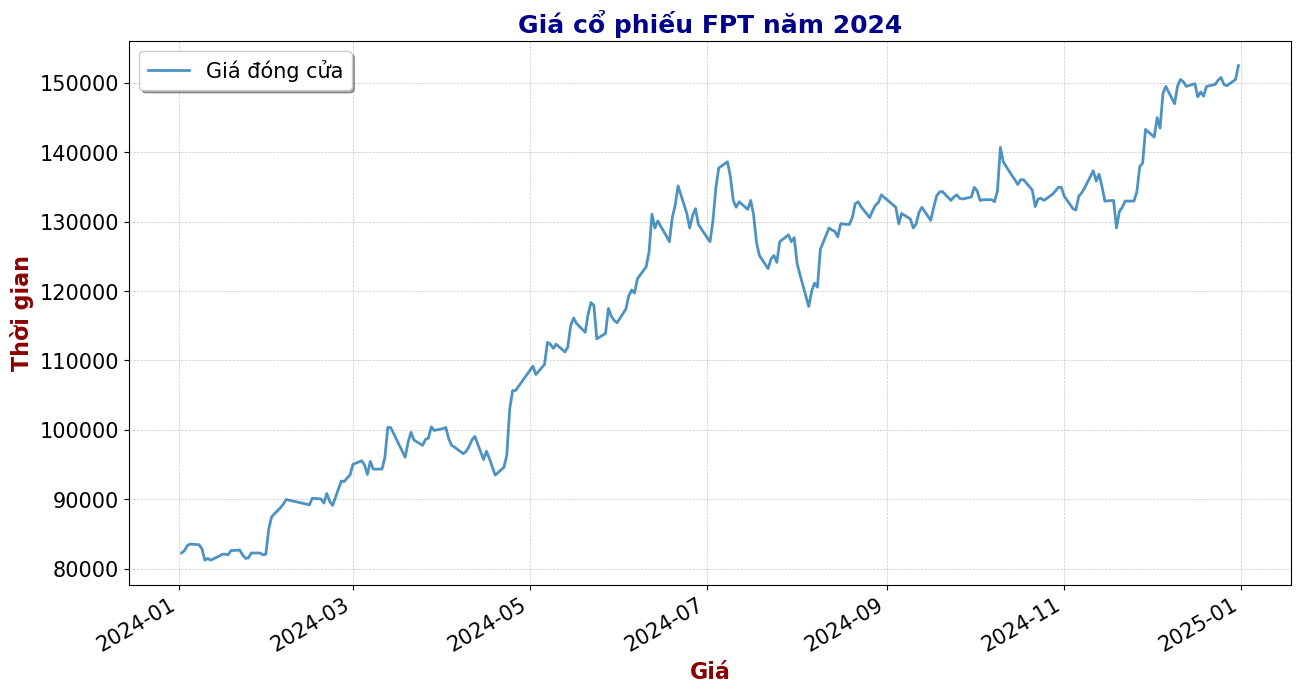

In [79]:
# Vẽ biểu đồ
fpt.plot(figsize = (15,8), fontsize=15, linewidth=2, alpha=0.8)  

# Thêm tiêu đề
plt.title("Giá cổ phiếu FPT năm 2024", fontsize=18, fontweight='bold', color='darkblue')

# Thêm nhãn trục
plt.xlabel("Giá", fontsize=16, fontweight='bold', color='darkred')
plt.ylabel("Thời gian", fontsize=16, fontweight='bold', color='darkred')

# Hiển thị lưới
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Hiển thị chú thích (legend)
plt.legend(loc="upper left", fontsize=15, frameon=True, shadow=True, facecolor='white')

# Hiển thị biểu đồ
plt.show()


In [81]:
fpt.rolling(window = 5).mean()

,Giá đóng cửa
Ngày giao dịch,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,83036.8
...,...
2024-12-25,149720.0
2024-12-26,150060.0
2024-12-27,150080.0


In [14]:
fpt.rolling(window = 10, min_periods=5).mean()

,Giá đóng cửa
Ngày giao dịch,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,83036.8
...,...
2024-12-25,149490.0
2024-12-26,149450.0
2024-12-27,149460.0


## Vẽ đường trung bình động (SMAs)

In [83]:
fpt["SMA13"] = fpt.rolling(window = 13, min_periods=13).mean()

In [85]:
fpt

,Giá đóng cửa,SMA13
Ngày giao dịch,,
2024-01-02,82248.0,NaN
2024-01-03,82591.0,NaN
2024-01-04,83363.0,NaN
2024-01-05,83534.0,NaN
2024-01-08,83448.0,NaN
...,...,...
2024-12-25,150800.0,149376.923077
2024-12-26,149800.0,149592.307692
2024-12-27,149600.0,149600.000000


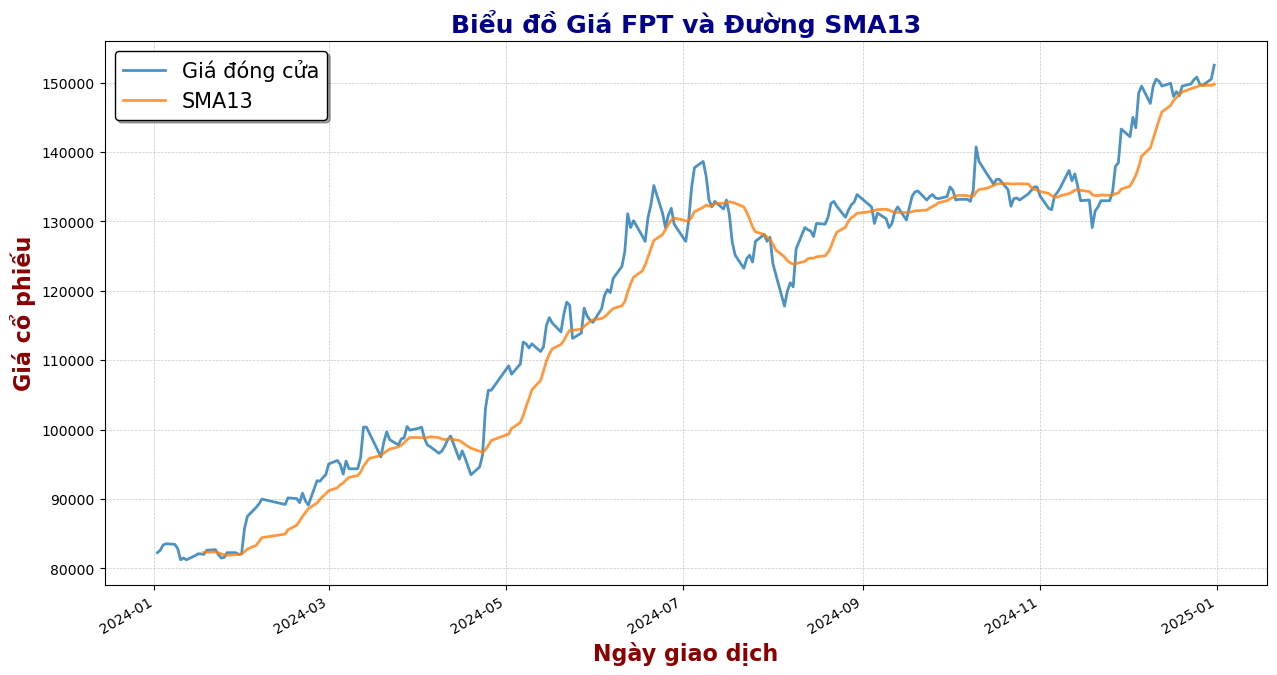

In [87]:
# Vẽ đường giá FPT và đường SMA với độ dày và độ trong suốt phù hợp
fpt.plot(figsize = (15,8), linewidth=2, alpha=0.8)

# Thêm tiêu đề biểu đồ
plt.title("Biểu đồ Giá FPT và Đường SMA13", fontsize=18, fontweight='bold', color='darkblue')

# Thêm nhãn trục
plt.xlabel("Ngày giao dịch", fontsize=16, fontweight='bold', color='darkred')
plt.ylabel("Giá cổ phiếu", fontsize=16, fontweight='bold', color='darkred')

# Hiển thị lưới với đường nét mảnh
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Hiển thị chú thích (legend) với viền đẹp
plt.legend(loc="upper left", fontsize=15, frameon=True, shadow=True, facecolor='white', edgecolor='black')

# Xoay nhãn trục X để dễ nhìn hơn
plt.xticks(rotation=30)

# Hiển thị biểu đồ
plt.show()


In [89]:
fpt["SMA21"] = fpt["Giá đóng cửa"].rolling(window = 21, min_periods=21).mean()

In [91]:
fpt

,Giá đóng cửa,SMA13,SMA21
Ngày giao dịch,,,
2024-01-02,82248.0,NaN,NaN
2024-01-03,82591.0,NaN,NaN
2024-01-04,83363.0,NaN,NaN
2024-01-05,83534.0,NaN,NaN
2024-01-08,83448.0,NaN,NaN
...,...,...,...
2024-12-25,150800.0,149376.923077,147156.380952
2024-12-26,149800.0,149592.307692,147721.047619
2024-12-27,149600.0,149600.000000,148252.571429


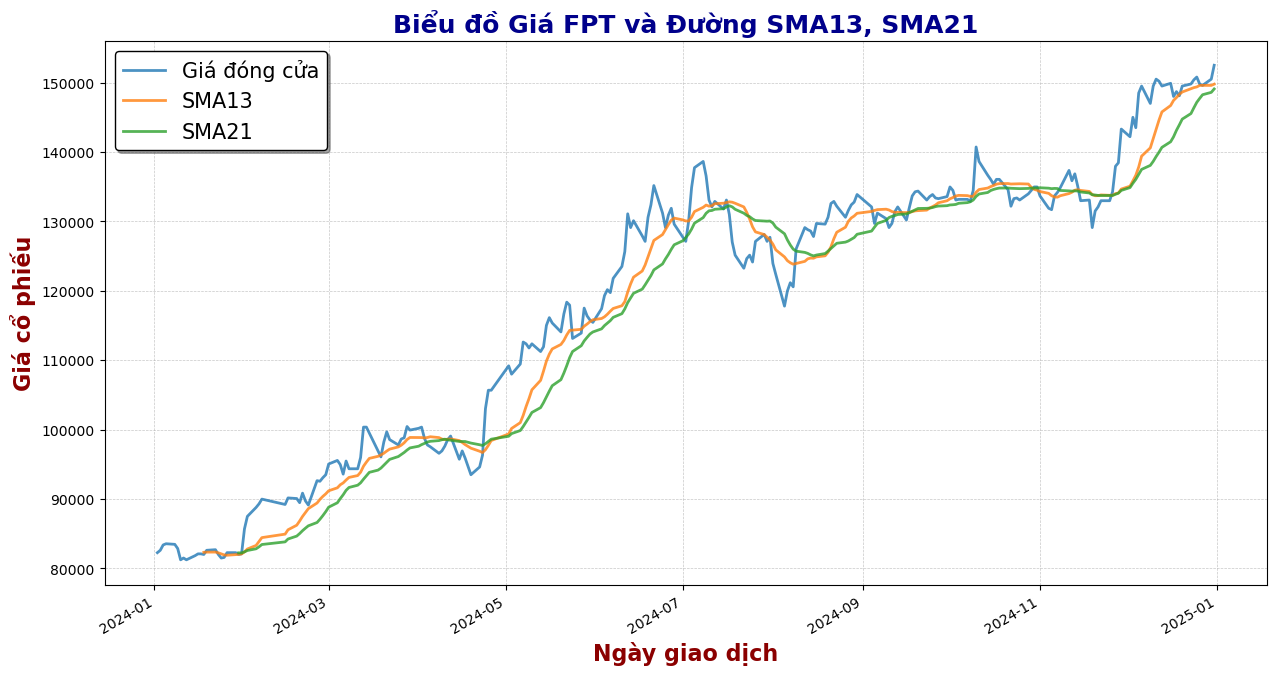

In [95]:
# Vẽ đường giá FPT và đường SMA với độ dày và độ trong suốt phù hợp
fpt.plot(figsize=(15, 8), linewidth=2, alpha=0.8)

# Thêm tiêu đề biểu đồ
plt.title("Biểu đồ Giá FPT và Đường SMA13, SMA21", fontsize=18, fontweight='bold', color='darkblue')

# Thêm nhãn trục
plt.xlabel("Ngày giao dịch", fontsize=16, fontweight='bold', color='darkred')
plt.ylabel("Giá cổ phiếu", fontsize=16, fontweight='bold', color='darkred')

# Hiển thị lưới với đường nét mảnh
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Hiển thị chú thích (legend) với viền đẹp
plt.legend(loc="upper left", fontsize=15, frameon=True, shadow=True, facecolor='white', edgecolor='black')

# Xoay nhãn trục X để dễ nhìn hơn
plt.xticks(rotation=30)
plt.savefig("veduongsma.png", format="png")
# Hiển thị biểu đồ
plt.show()

## Làm báo cáo

In [97]:
fpt = fpt[[fpt.columns[0]]]  # Chọn cột đầu tiên theo tên cột

In [99]:
fpt.head()

,Giá đóng cửa
Ngày giao dịch,
2024-01-02,82248.0
2024-01-03,82591.0
2024-01-04,83363.0
2024-01-05,83534.0
2024-01-08,83448.0


In [107]:
fpt.resample("W-FRI").last().pct_change().dropna().head()

,Giá đóng cửa
Ngày giao dịch,
2024-01-12,-0.027713
2024-01-19,0.016893
2024-01-26,-0.004153
2024-02-02,0.063600
2024-02-09,0.028441


In [109]:
loinhuan_tuan = fpt.resample("W-FRI").last().pct_change().dropna()

In [111]:
loinhuan_tuan.head()

,Giá đóng cửa
Ngày giao dịch,
2024-01-12,-0.027713
2024-01-19,0.016893
2024-01-26,-0.004153
2024-02-02,0.063600
2024-02-09,0.028441


In [113]:
loinhuan_tuan["Lợi nhuận"] = loinhuan_tuan["Giá đóng cửa"].rolling(4).mean() * 52

In [115]:
loinhuan_tuan["Biến động"] = loinhuan_tuan["Giá đóng cửa"].rolling(4).std()*np.sqrt(52)

In [117]:
loinhuan_tuan.dropna(inplace= True)

In [127]:
loinhuan_tuan.iloc[:, 1:].head()

,Lợi nhuận,Biến động
Ngày giao dịch,,
2024-02-02,0.632147,0.280044
2024-02-09,1.362154,0.204459
2024-02-16,1.167259,0.222621
2024-02-23,1.072842,0.238628
2024-03-01,1.109407,0.247459


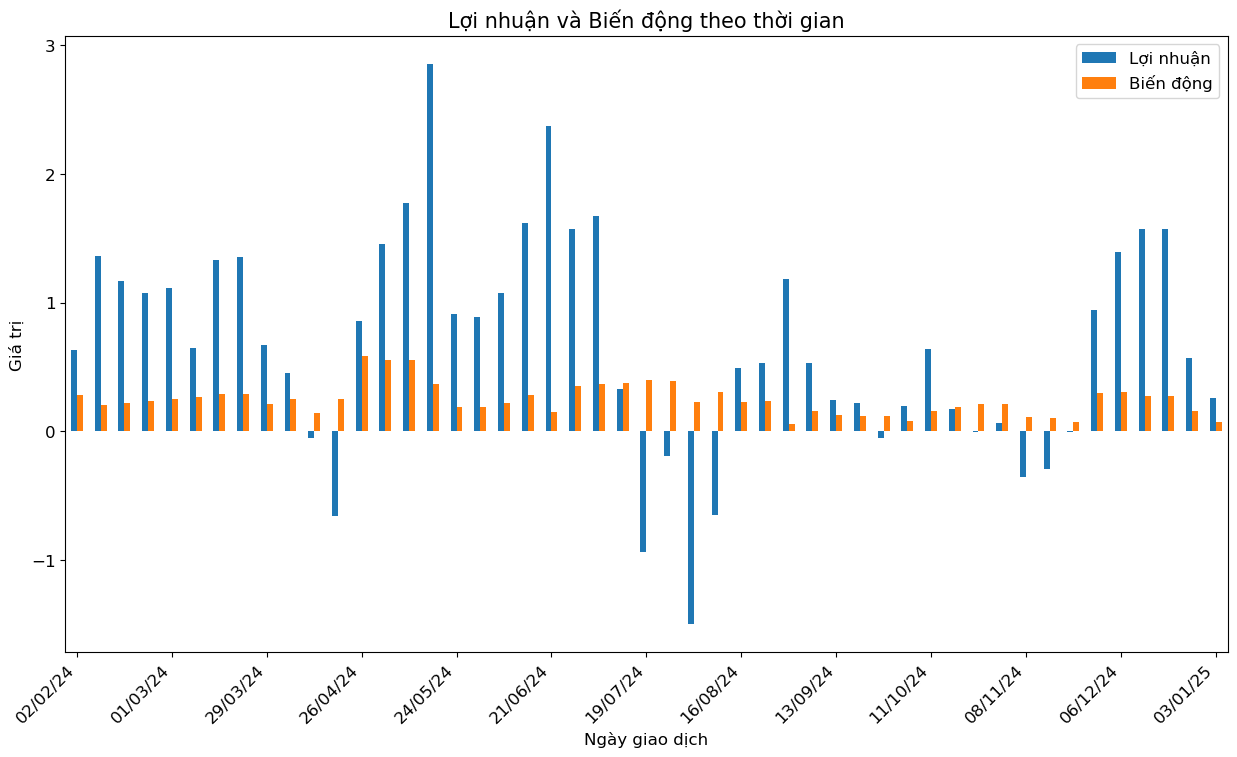

In [129]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vẽ từng dòng dữ liệu với label
loinhuan_tuan.iloc[:, -2:].plot(kind='bar', ax=ax, fontsize=12, label=['Lợi nhuận', 'Biến động'])

# Xoay nhãn trục X
selected_dates = loinhuan_tuan.index[::4]
selected_positions = [loinhuan_tuan.index.get_loc(date) for date in selected_dates]

ax.set_xticks(selected_positions)
ax.set_xticklabels(selected_dates.strftime('%d/%m/%y'), rotation=45, ha='right')

# Hiển thị chú thích (legend)
plt.legend(fontsize=12)

# Thêm tiêu đề và nhãn trục
plt.title("Lợi nhuận và Biến động theo thời gian", fontsize=15)
plt.xlabel("Ngày giao dịch", fontsize=12)
plt.ylabel("Giá trị", fontsize=12)

plt.show()